In [93]:
# Data wrangling of "Statewide COVID-19 Cases Deaths Tests" dataset
# Data retrieved from Data.gov, URL: https://catalog.data.gov/dataset/covid-19-time-series-metrics-by-county-and-state/resource/9ef50c1a-3a3d-4882-bbe8-89faaab5a157
# Code and submission by Olina (Qiuyu) Zhu, NetID: qz258

# import libraries
import pandas as pd
import seaborn as sns
import numpy as np

# import dataset as pandas dataframe
covid_data = pd.read_csv("covid19cases_test.csv")
covid_data.head()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
0,2020-02-01,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0.0,0,0.0,0.0,0.0,0.0,NaN
1,2020-02-02,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
2,2020-02-03,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
3,2020-02-04,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
4,2020-02-05,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN


In [94]:
# remove unnecessary columns
data = covid_data.drop(columns=["reported_tests", "area_type"])

In [95]:
# Showing total number of entries per area
gb_area_entries = data.groupby("area")["cases"].count().reset_index()
gb_area_entries.head()

,area,cases
0,Alameda,591
1,Alpine,591
2,Amador,591
3,Butte,591
4,Calaveras,591


<AxesSubplot:title={'center':'Positive tests over time by area (%)'}, xlabel='date', ylabel='percent_positive'>

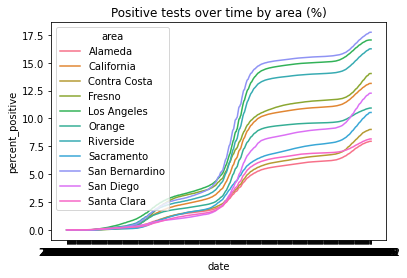

In [97]:
# plot of percentage of population that tested positive for covid overtime in areas with population > 1000000
data["percent_positive"] = (data["cumulative_positive_tests"] / data["population"]) * 100
large_populations = data[data["population"] > 1000000]
percent_pos = sns.lineplot(data=large_populations, x="date", y="percent_positive", hue="area")
percent_pos.set_title("Positive tests over time by area (%)")
percent_pos

C:\Users\olina\AppData\Local\Temp/ipykernel_16156/1865662106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:title={'center':'Deaths over time by area (%)'}, xlabel='date', ylabel='percent_dead'>

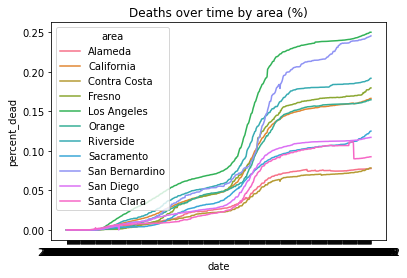

In [98]:
# plot of percentage of population that died from covid overtime in areas with population > 1000000
large_populations = data[data["population"] > 1000000]
large_populations["percent_dead"] = (large_populations["cumulative_reported_deaths"] / large_populations["population"]) * 100
percent_d = sns.lineplot(data=large_populations, x="date", y="percent_dead", hue="area")
percent_d.set_title("Deaths over time by area (%)")
percent_d

In [99]:
# most recent data and plots
latest_update = large_populations[large_populations["date"] == "2021-09-10"]
state_total_cases = latest_update["cumulative_cases"].sum()
print("There are", int(state_total_cases), "recorded cases of covid in densely populated areas of California from 2020-02-01 to 2021-09-10.")

There are 7640300 recorded cases of covid in densely populated areas of California from 2020-02-01 to 2021-09-10.


<AxesSubplot:title={'center':'Cumulative cases in California by area as of 2021-09-10'}, xlabel='area', ylabel='cumulative_cases'>

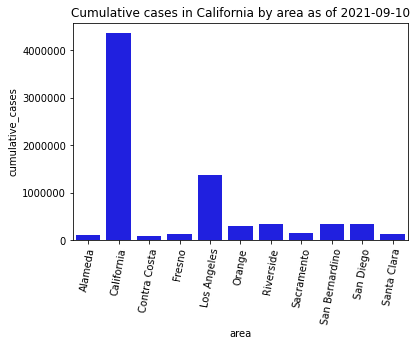

In [105]:
# plot cumulative cases in California in areas with population > 1000000
total_cases_area = sns.barplot(data=latest_update, x='area',y='cumulative_cases', color="blue")
total_cases_area.set_title("Cumulative cases in California by area as of 2021-09-10")
total_cases_area.tick_params(axis='x', rotation=80)
total_cases_area.ticklabel_format(style='plain', axis='y')
total_cases_area

C:\Users\olina\AppData\Local\Temp/ipykernel_16156/4008780771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:title={'center':'Percentage of people tested in California by area as of 2021-09-10'}, xlabel='date', ylabel='percent_tested'>

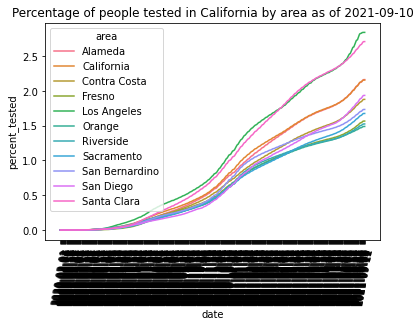

In [108]:
# plot percentage of people tested in California in areas with population > 1000000 over time
large_populations["percent_tested"] = large_populations['cumulative_total_tests'] / large_populations['population']
percent_tested = sns.lineplot(data=large_populations, x='date',y='percent_tested', hue="area")
percent_tested.set_title("Percentage of people tested in California by area as of 2021-09-10")
percent_tested.tick_params(axis='x', rotation=80)
percent_tested.ticklabel_format(style='plain', axis='y')
percent_tested
